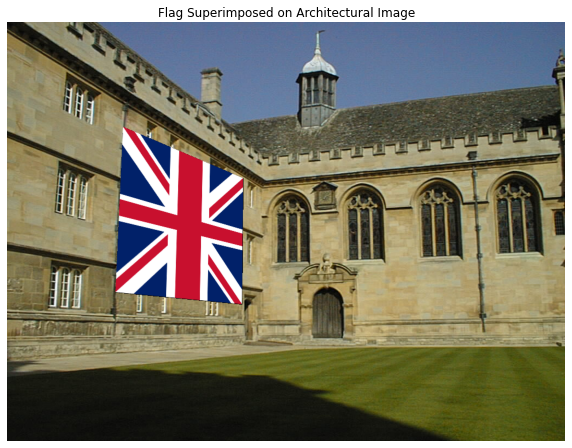

True

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images (architectural image and flag image)
architecture_img = cv2.imread('Resources/architecture.jpg')
flag_img = cv2.imread('Resources/flag.png')

# Resize flag for better fitting if needed (optional)
# flag_img = cv2.resize(flag_img, (400, 300)) # adjust size as needed
# architecture_img = cv2.resize(architecture_img, (400, 300))

# Function to click points on the image
clicked_points = []
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked_points.append((x, y))
        cv2.circle(architecture_img_copy, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow('Select 4 points on the architectural image', architecture_img_copy)

# Create a copy of the image to display clicks
architecture_img_copy = architecture_img.copy()
cv2.imshow('Select 4 points on the architectural image', architecture_img_copy)
cv2.setMouseCallback('Select 4 points on the architectural image', click_event)

# Wait until 4 points are clicked
while len(clicked_points) < 4:
    cv2.waitKey(1)

cv2.destroyAllWindows()

# These are the points selected on the architectural image
pts_dst = np.array(clicked_points, dtype=np.float32)

# Define 4 corners of the flag image (assuming the full image is used)
h, w, _ = flag_img.shape
pts_src = np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)

# Compute the homography matrix
H, status = cv2.findHomography(pts_src, pts_dst)

# Warp the flag image to fit onto the architectural image
warped_flag = cv2.warpPerspective(flag_img, H, (architecture_img.shape[1], architecture_img.shape[0]))

# Create a mask for blending the flag
flag_mask = np.zeros_like(architecture_img, dtype=np.uint8)
cv2.fillConvexPoly(flag_mask, pts_dst.astype(int), (255, 255, 255))

# Invert mask to remove flag area from the architectural image
architecture_img_masked = cv2.bitwise_and(architecture_img, cv2.bitwise_not(flag_mask))

# Combine the warped flag and the architectural image
result = cv2.add(architecture_img_masked, warped_flag)

# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Flag Superimposed on Architectural Image')
plt.axis('off')
plt.show()

# Save the output if desired
cv2.imwrite('output_image.jpg', result)
